In [ ]:
%tensorflow_version 2.x
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

np.set_printoptions(precision=6, suppress=True)

In [ ]:
# !wget https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
# !unzip -q flying-vehicles.zip

--2021-04-16 12:13:56--  https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.204.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540232238 (1.4G) [application/x-zip-compressed]
Saving to: ‘flying-vehicles.zip’

flying-vehicles.zip 100%[===================>]   1.43G  45.0MB/s    in 43s     

2021-04-16 12:14:42 (34.0 MB/s) - ‘flying-vehicles.zip’ saved [1540232238/1540232238]



In [ ]:
!rm -rf ./images

In [ ]:
base_dir = './data/planes'
raw_no_of_files = {}
classes = ['drone', 'fighter-jet', 'helicopter', 'missile', 'passenger-plane', 'rocket']
for dir in classes:
    raw_no_of_files[dir] = len(os.listdir(os.path.join(base_dir, dir)))

raw_no_of_files.items()

dict_items([('drone', 1332), ('fighter-jet', 1867), ('helicopter', 1387), ('missile', 1334), ('passenger-plane', 1424), ('rocket', 1186)])

In [ ]:
data_dir = './images'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train') 
valid_dir = os.path.join(data_dir, 'valid')   
test_dir = os.path.join(data_dir, 'test')      

train_rocket_dir = os.path.join(train_dir, 'rocket')
train_jet_dir = os.path.join(train_dir, 'fighter-jet')

valid_rocket_dir = os.path.join(valid_dir, 'rocket')
valid_jet_dir = os.path.join(valid_dir, 'fighter-jet')

test_rocket_dir = os.path.join(test_dir, 'rocket')
test_jet_dir = os.path.join(test_dir, 'fighter-jet')

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

dirs = [train_rocket_dir, train_jet_dir, valid_rocket_dir, valid_jet_dir, test_rocket_dir, test_jet_dir]

for dir in dirs:
    if not os.path.exists(dir):
        os.mkdir(dir)      

In [ ]:
rocket_file_names = os.listdir(os.path.join(base_dir, 'rocket'))
jet_file_names = os.listdir(os.path.join(base_dir, 'fighter-jet'))

rocket_file_names = [fname for fname in rocket_file_names if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
jet_file_names = [fname for fname in jet_file_names if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

In [ ]:
size = min(len(rocket_file_names), len(jet_file_names))

train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

#przedziały podziału zdjęć
train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size

In [ ]:
for i, fname in enumerate(rocket_file_names):
    if i <= train_idx:
        src = os.path.join(base_dir, 'rocket', fname)
        dst = os.path.join(train_rocket_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'rocket', fname)
        dst = os.path.join(valid_rocket_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'rocket', fname)
        dst = os.path.join(test_rocket_dir, fname)
        shutil.copyfile(src, dst)

for i, fname in enumerate(jet_file_names):
    if i <= train_idx:
        src = os.path.join(base_dir, 'fighter-jet', fname)
        dst = os.path.join(train_jet_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'fighter-jet', fname)
        dst = os.path.join(valid_jet_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'fighter-jet', fname)
        dst = os.path.join(test_jet_dir, fname)
        shutil.copyfile(src, dst) 

print('rocket - zbiór treningowy', len(os.listdir(train_rocket_dir)))
print('rocket - zbiór walidacyjny', len(os.listdir(valid_rocket_dir)))
print('rocket - zbiór testowy', len(os.listdir(test_rocket_dir)))

print('fighter-jet - zbiór treningowy', len(os.listdir(train_jet_dir)))
print('fighter-jet - zbiór walidacyjny', len(os.listdir(valid_jet_dir)))
print('fighter-jet - zbiór testowy', len(os.listdir(test_jet_dir)))               

rocket - zbiór treningowy 822
rocket - zbiór walidacyjny 234
rocket - zbiór testowy 117
fighter-jet - zbiór treningowy 822
fighter-jet - zbiór walidacyjny 234
fighter-jet - zbiór testowy 117


(-0.5, 1279.5, 719.5, -0.5)

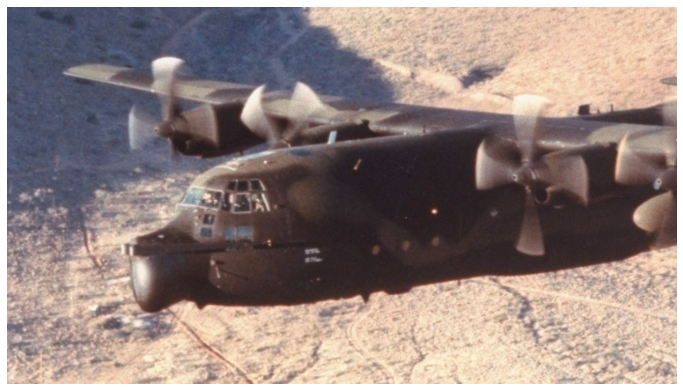

In [ ]:
#@title Indeks zdjęcia:

idx = 174 #@param {type:'slider', min:0, max:919}
names_mapping = dict(enumerate(rocket_file_names))
img_path = os.path.join(train_rocket_dir, names_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis(False)

(-0.5, 779.5, 439.5, -0.5)

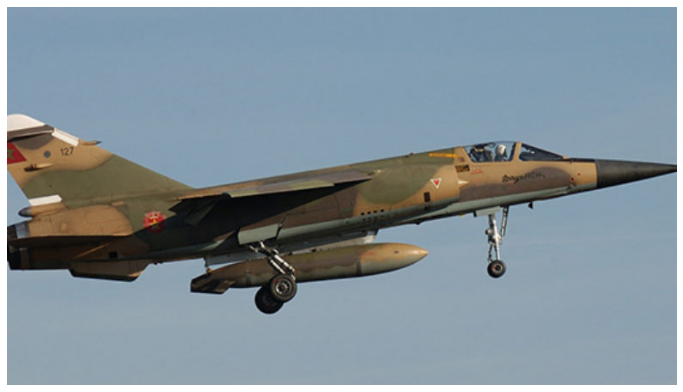

In [ ]:
#@title Indeks zdjęcia:

idx = 699 #@param {type:'slider', min:0, max:919}
names_mapping = dict(enumerate(jet_file_names))
img_path = os.path.join(train_jet_dir, names_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(12, 10))
plt.imshow(img)

plt.axis(False)

In [ ]:
#generowanie wiekszego zbioru treningowego!
train_datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# przeskalowujemy wszystkie obrazy o współczynnik 1/255
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1644 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [ ]:
def display_augmented_images(directory, idx):
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

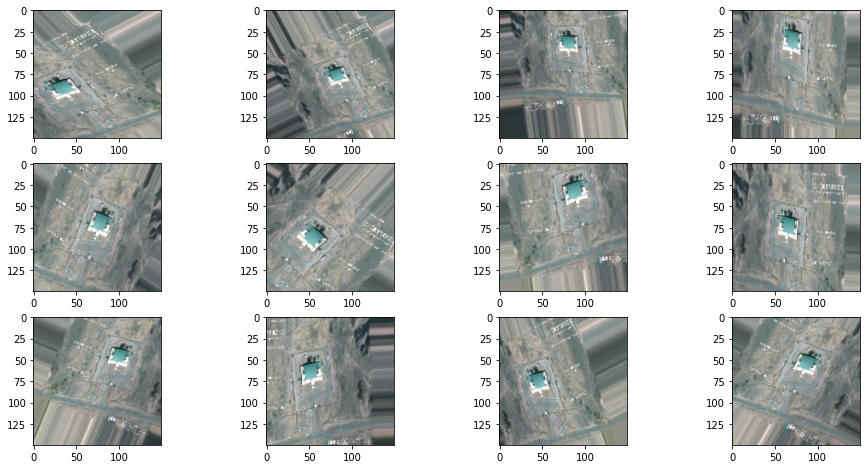

In [ ]:
#@title Zbiór treningowy:
idx = 359 #@param {type:'slider', min:0, max:919}            
display_augmented_images(train_rocket_dir, idx)

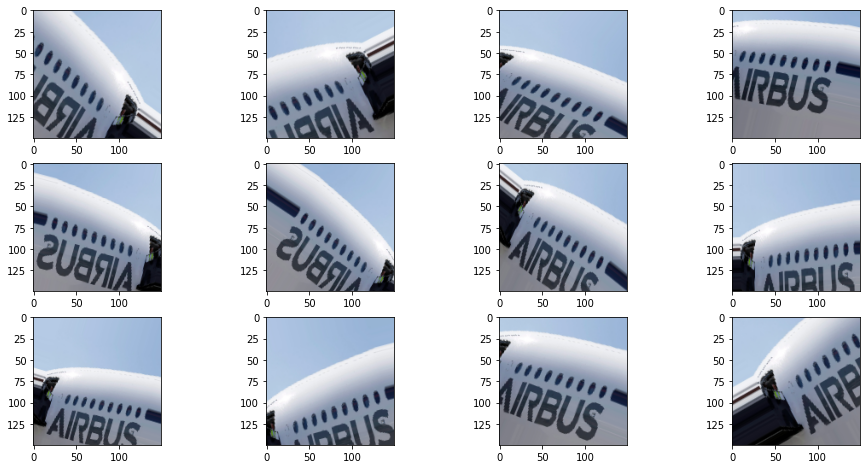

In [ ]:
#@title Zbiór treningowy:
idx = 336 #@param {type:'slider', min:0, max:919}
display_augmented_images(train_jet_dir, idx)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
!rm -rf logs
!mkdir logs

tensorboard = TensorBoard(log_dir='logs')

In [ ]:
batch_size = 32
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size

history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=30,    # 100
                             validation_data=valid_generator,
                             validation_steps=validation_steps,
                             callbacks=[tensorboard])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/30
25/25 [==============================] - 56s 936ms/step - loss: 0.6966 - accuracy: 0.5724 - val_loss: 0.6786 - val_accuracy: 0.5580
Epoch 2/30
25/25 [==============================] - 21s 831ms/step - loss: 0.6682 - accuracy: 0.5712 - val_loss: 0.6576 - val_accuracy: 0.6384
Epoch 3/30
25/25 [==============================] - 22s 888ms/step - loss: 0.6553 - accuracy: 0.6197 - val_loss: 0.6787 - val_accuracy: 0.5625
Epoch 4/30
25/25 [==============================] - 21s 860ms/step - loss: 0.6455 - accuracy: 0.6088 - val_loss: 0.6553 - val_accuracy: 0.6161
Epoch 5/30
25/25 [==============================] - 23s 936ms/step - loss: 0.6501 - accuracy: 0.6295 - val_loss: 0.6526 - val_accuracy: 0.6116
Epoch 6/30
25/25 [==============================] - 20s 808ms/step - loss: 0.6604 - accuracy: 0.5955 - val_loss: 0.6205 - val_accuracy: 0.6429
Epoch 7/30
25/25 [==============================] - 22s 895ms/step - loss: 0.6435 - accuracy: 0.6350 - val_loss: 0.6408 - val_accuracy: 0.6295

In [ ]:
%load_ext tensorboard

In [ ]:
!tensorboard dev upload --logdir logs

2021-04-13 18:27:48.356085: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scop

In [ ]:

def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = True

def print_layers(model):
    for layer in model.layers:
        print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')

print_layers(conv_base)

layer_name: input_2       trainable: True
layer_name: block1_conv1  trainable: True
layer_name: block1_conv2  trainable: True
layer_name: block1_pool   trainable: True
layer_name: block2_conv1  trainable: True
layer_name: block2_conv2  trainable: True
layer_name: block2_pool   trainable: True
layer_name: block3_conv1  trainable: True
layer_name: block3_conv2  trainable: True
layer_name: block3_conv3  trainable: True
layer_name: block3_pool   trainable: True
layer_name: block4_conv1  trainable: True
layer_name: block4_conv2  trainable: True
layer_name: block4_conv3  trainable: True
layer_name: block4_pool   trainable: True
layer_name: block5_conv1  trainable: True
layer_name: block5_conv2  trainable: True
layer_name: block5_conv3  trainable: True
layer_name: block5_pool   trainable: True


In [ ]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print_layers(conv_base)

layer_name: input_2       trainable: False
layer_name: block1_conv1  trainable: False
layer_name: block1_conv2  trainable: False
layer_name: block1_pool   trainable: False
layer_name: block2_conv1  trainable: False
layer_name: block2_conv2  trainable: False
layer_name: block2_pool   trainable: False
layer_name: block3_conv1  trainable: False
layer_name: block3_conv2  trainable: False
layer_name: block3_conv3  trainable: False
layer_name: block3_pool   trainable: False
layer_name: block4_conv1  trainable: False
layer_name: block4_conv2  trainable: False
layer_name: block4_conv3  trainable: False
layer_name: block4_pool   trainable: False
layer_name: block5_conv1  trainable: True
layer_name: block5_conv2  trainable: True
layer_name: block5_conv3  trainable: True
layer_name: block5_pool   trainable: True


In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=30,    # 100
                             validation_data=valid_generator,
                             validation_steps=validation_steps,
                             callbacks=[tensorboard])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/30
25/25 [==============================] - 25s 844ms/step - loss: 0.6956 - accuracy: 0.5549 - val_loss: 0.6453 - val_accuracy: 0.5848
Epoch 2/30
25/25 [==============================] - 22s 853ms/step - loss: 0.6302 - accuracy: 0.6308 - val_loss: 0.5709 - val_accuracy: 0.7188
Epoch 3/30
25/25 [==============================] - 23s 913ms/step - loss: 0.6179 - accuracy: 0.6380 - val_loss: 0.6224 - val_accuracy: 0.6562
Epoch 4/30
25/25 [==============================] - 22s 872ms/step - loss: 0.6195 - accuracy: 0.6258 - val_loss: 0.5688 - val_accuracy: 0.6473
Epoch 5/30
25/25 [==============================] - 22s 881ms/step - loss: 0.5930 - accuracy: 0.6387 - val_loss: 0.5909 - val_accuracy: 0.6205
Epoch 6/30
25/25 [==============================] - 22s 876ms/step - loss: 0.5626 - accuracy: 0.6951 - val_loss: 0.5709 - val_accuracy: 0.6741
Epoch 7/30
25/25 [==============================] - 21s 824ms/step - loss: 0.5634 - accuracy: 0.7107 - val_loss: 0.6155 - val_accuracy: 0.6696

In [ ]:
plot_hist(history)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

y_prob = model.predict_generator(test_generator, test_generator.samples)
y_prob = y_prob.ravel()
y_prob

Found 234 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



array([0.625285, 0.632657, 0.594633, 0.593682, 0.313967, 0.992082,
       0.652573, 0.385183, 0.770699, 0.597335, 0.569847, 0.678799,
       0.454102, 0.693776, 0.343716, 0.408608, 0.597054, 0.308829,
       0.721671, 0.48893 , 0.653202, 0.389465, 0.611859, 0.39798 ,
       0.621937, 0.321619, 0.50437 , 0.715207, 0.587841, 0.377633,
       0.657692, 0.275559, 0.525347, 0.420943, 0.53659 , 0.487796,
       0.540617, 0.423189, 0.431804, 0.508156, 0.46804 , 0.257038,
       0.660111, 0.598732, 0.562197, 0.466389, 0.235396, 0.473735,
       0.23295 , 0.646588, 0.278755, 0.449503, 0.615049, 0.285907,
       0.419767, 0.549437, 0.282051, 0.532842, 0.326455, 0.586736,
       0.301662, 0.337248, 0.518878, 0.596632, 0.41446 , 0.688813,
       0.617018, 0.565764, 0.149587, 0.450112, 0.620635, 0.561819,
       0.438199, 0.480657, 0.348043, 0.171184, 0.573648, 0.251237,
       0.330565, 0.595864, 0.218162, 0.263387, 0.451718, 0.101846,
       0.473335, 0.521185, 0.078074, 0.26002 , 0.212914, 0.298

In [ ]:
predictions  = pd.DataFrame({'y_prob': y_prob})
predictions['class'] = predictions['y_prob'].apply(lambda x: 1 if x > 0.5 else 0)
predictions

,y_prob,class
0,0.625285,1
1,0.632657,1
2,0.594633,1
3,0.593682,1
4,0.313967,0
...,...,...
229,0.467289,0
230,0.534000,1
231,0.140852,0
232,0.747606,1


In [ ]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred = predictions['class'].values
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[71, 46],
       [35, 82]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       117
           1       0.64      0.70      0.67       117

    accuracy                           0.65       234
   macro avg       0.66      0.65      0.65       234
weighted avg       0.66      0.65      0.65       234

